<a href="https://colab.research.google.com/github/AI-KPI/DLBookNotes/blob/main/2.3 Identity and Inverse Matrices/2.3_Identity_and_Inverse_Matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Параметри
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Уникайте неточних плаваючих значень (наприклад, у скалярному добутку зворотніх матриць)
# Перегляньте: https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

In [4]:
%%html
<style>
.pquote {
  text-align: left;
  margin: 40px 0 40px auto;
  width: 70%;
  font-size: 1.5em;
  font-style: italic;
  display: block;
  line-height: 1.3em;
  color: #5a75a7;
  font-weight: 600;
  border-left: 5px solid rgba(90, 117, 167, .1);
  padding-left: 6px;
}
.notes {
  font-style: italic;
  display: block;
  margin: 40px 10%;
}
img + em {
  text-align: center;
  display: block;
  color: gray;
  font-size: 0.9em;
  font-weight: 600;
}
</style>

$$
\newcommand\bs[1]{\boldsymbol{#1}}
$$

<span class='notes'>
   Цей матеріал є частиною серії 2 глави про лінійну алгебру з [Deep Learning Book](http://www.deeplearningbook.org/) by Goodfellow, I., Bengio, Y., and Courville, A. (2016). Він спрямований на надання інформації, ілюстрацій та коду на мові python, про математичні теорії і побудований на моєму розуміння цих понять. Ви можете перевірити навчальний план у [introduction post(вступній публікації)] (https://hadrienj.github.io/posts/Deep-Learning-Book-Series-Introduction/).
</span>

# Вступ

Цей розділ є легким, але містить деякі важливі визначення. Концепція матриці ідентичності або оберненої матриці буде потрібною в наступних главах. В кінці цього розділу ми побачимо, що можемо розв’язувати системи лінійних рівнянь, використовуючи зворотну матрицю. Щасти:)!

# 2.3 Тотожність і зворотні матриці


# Матриці ідентичності

Матриця ідентичності $\bs{I}_n$ це спеціальна матриця форми ($n \times n$) що заповнюється $0$ за винятком діагоналі, якою заповнюється 1.

<img src="images/identity-matrix.png" width="150" alt="Приклад матриці ідентичності" title="Identity matrix">
<em>Матриця ідентичності 3 на 3</em>

Матрицю ідентичності можна створити за допомогою функції Numpy `eye()`:

In [5]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Коли 'застосовується' матриця ідентичності до вектора, результатом є той самий вектор:

$$\bs{I}_n\bs{x} = \bs{x}$$

### Приклад 1.

$$
\begin{bmatrix}
    1 & 0 & 0 \\\\
    0 & 1 & 0 \\\\
    0 & 0 & 1
\end{bmatrix}
\times
\begin{bmatrix}
    x_{1} \\\\
    x_{2} \\\\
    x_{3}
\end{bmatrix}=
\begin{bmatrix}
    1 \times x_1 + 0 \times x_2 + 0\times x_3 \\\\
    0 \times x_1 + 1 \times x_2 + 0\times x_3 \\\\
    0 \times x_1 + 0 \times x_2 + 1\times x_3
\end{bmatrix}=
\begin{bmatrix}
    x_{1} \\\\
    x_{2} \\\\
    x_{3}
\end{bmatrix}
$$

In [6]:
x = np.array([[2], [6], [3]])
x

array([[2],
       [6],
       [3]])

In [7]:
xid = np.eye(x.shape[0]).dot(x)
xid

array([[2.],
       [6.],
       [3.]])

## Інтуїція

Ви можете подумати, що матриця це спосіб перетворення об’єктів у $n$-вимірному просторі. Проте тут застосовується лінійне перетворення простору. Ми можемо сказати, що 'застосовуємо' матрицю до елемента: це означає, що ми робимо скалярний добуток між цією матрицею та елементом (детальніше про скалярний добуток у [2.2](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.2-Multiplying-Matrices-and-Vectors/)).Це поняття ми детально розглянемо в наступних розділах, але матриця ідентичності є гарним першим прикладом. Це приклад заснований на практиці, оскільки простір не змінюється, коли ми 'застосовуємо' матрицю ідентичності до нього.

<span class='pquote'>
    Простір не змінюється, коли ми 'застосовуємо' матрицю ідентичності до нього
</span>

Ми бачили, що $\bs{x}$ не було змінено після множення на $\bs{I}$.

# Обернені матриці

Матриця, обернена до $\bs{A}$ позначається $\bs{A}^{-1}$. Саме матриця дає результат матриці ідентичності, коли її множать на $\bs{A}$:

$$\bs{A}^{-1}\bs{A}=\bs{I}_n$$

Це означає, що якщо ми застосуємо лінійне перетворення до простору з $\bs{A}$, можна повернутися з $\bs{A}^{-1}$. Це забезпечує спосіб скасування трансформації.

### Приклад 2.

$$
\bs{A}=\begin{bmatrix}
    3 & 0 & 2 \\\\
    2 & 0 & -2 \\\\
    0 & 1 & 1
\end{bmatrix}
$$

У цьому прикладі ми будемо використовувати функцію Numpy `linalg.inv()` для обчислення оберненого до $\bs{A}$. Почнемо зі створення $\bs{A}$:

In [8]:
A = np.array([[3, 0, 2], [2, 0, -2], [0, 1, 1]])
A

array([[ 3,  0,  2],
       [ 2,  0, -2],
       [ 0,  1,  1]])

Тепер обчислюємо його обернене:

In [9]:
A_inv = np.linalg.inv(A)
A_inv

array([[ 0.2,  0.2,  0. ],
       [-0.2,  0.3,  1. ],
       [ 0.2, -0.3, -0. ]])

Ми можемо це перевірити $\bs{A_{inv}}$ це обернена матриця $\bs{A}$ з Python:

In [10]:
A_bis = A_inv.dot(A)
A_bis

array([[ 1.,  0., -0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

Ми побачимо, що обернені матриці можуть бути дуже корисними, наприклад, для вирішення набору лінійних рівнянь. Однак слід зазначити, що неквадратні матриці (матриці з більшою кількістю стовпців, ніж рядків, або більше рядків, ніж стовпці) не мають зворотних матриць.

# Розв’язування системи лінійних рівнянь

Вступ до системи лінійних рівнянь можна знайти в [2.2](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.2-Multiplying-Matrices-and-Vectors/).

Обернену матрицю можна використовувати для розв’язання рівняння $\bs{Ax}=\bs{b}$ додавши його до кожного значення:

$$\bs{A}^{-1}\bs{Ax}=\bs{A}^{-1}\bs{b}$$

Оскільки ми за визначенням знаємо, що $\bs{A}^{-1}\bs{A}=\bs{I}$, ми маємо:

$$\bs{I}_n\bs{x}=\bs{A}^{-1}\bs{b}$$

Ми побачили, що вектор не змінюється при множенні на матрицю ідентичності. Тож ми можемо написати:

$$\bs{x}=\bs{A}^{-1}\bs{b}$$

Це чудово! Ми можемо вирішити набір лінійних рівнянь, просто обчисливши обернене до $\bs{A}$ і застосувати цю матрицю до вектора результатів $\bs{b}$!

Давайте спробуємо це!

### Приклад 3.

Ми візьмемо простий розв'язуваний приклад:

$$
\begin{cases}
y = 2x \\\\
y = -x +3
\end{cases}
$$

Ми будемо використовувати позначення, яке ми бачили в [2.2](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.2-Multiplying-Matrices-and-Vectors/):

$$
\begin{cases}
A_{1,1}x_1 + A_{1,2}x_2 = b_1 \\\\
A_{2,1}x_1 + A_{2,2}x_2= b_2
\end{cases}
$$

Ось, $x_1$ відповідає $x$ і $x_2$ відповідає до $y$. Отже, маємо:

$$
\begin{cases}
2x_1 - x_2 = 0 \\\\
x_1 + x_2= 3
\end{cases}
$$

Наша матриця $\bs{A}$ має вигляд:

$$
\bs{A}=
\begin{bmatrix}
    2 & -1 \\\\
    1 & 1
\end{bmatrix}
$$

І вектор $\bs{b}$ містять розв'язки окремих рівнянь є:

$$
\bs{b}=
\begin{bmatrix}
    0 \\\\
    3
\end{bmatrix}
$$

Під матричною формою наші системи стають:

$$
\begin{bmatrix}
    2 & -1 \\\\
    1 & 1
\end{bmatrix}
\begin{bmatrix}
    x_1 \\\\
    x_2
\end{bmatrix}=
\begin{bmatrix}
    0 \\\\
    3
\end{bmatrix}
$$

Знайдемо обернене до $\bs{A}$:

In [11]:
A = np.array([[2, -1], [1, 1]])
A

array([[ 2, -1],
       [ 1,  1]])

In [12]:
A_inv = np.linalg.inv(A)
A_inv

array([[ 0.33333333,  0.33333333],
       [-0.33333333,  0.66666667]])

Ми також маємо:

In [13]:
b = np.array([[0], [3]])

Оскільки ми це бачили

$$\bs{x}=\bs{A}^{-1}\bs{b}$$

Ми маємо:

In [14]:
x = A_inv.dot(b)
x

array([[1.],
       [2.]])

Це наше рішення! 

$$
\bs{x}=
\begin{bmatrix}
    1 \\\\
    2
\end{bmatrix}
$$

Це означає, що точка координат (1, 2) є рішенням і знаходиться на перетині прямих, що представляють рівняння. Давайте побудуємо їх для перевірки цього рішення:

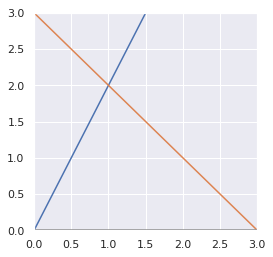

In [15]:
x = np.arange(-10, 10)
y = 2*x
y1 = -x + 3

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(0, 3)
plt.ylim(0, 3)
# draw axes
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')
plt.show()
plt.close()

Ми бачимо, що рішенням (яке відповідає перетину лінії) є тоді, коли $x=1$ and $y=2$. Це підтверджує те, що ми знайшли з інверсією матриці!

## БОНУС: Підказка щодо кодування

Щоб скласти рівняння з Matplotlib, нам спочатку потрібно створити вектор із усіма $x$ значення. Власне, оскільки це рядок, було б достатньо лише двох пунктів.Але при більш складних функціях довжина вектора $x$ відповідає частоті дискретизації. Отже, тут ми використовували функцію Numpy `arrange()` (перегляньте це [doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html)) для створення вектора з $-10$ до $10$ (не включаючи).

In [16]:
np.arange(-10, 10)

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

Перший аргумент - початкова точка, а другий - кінцева точка. Ви можете додати третій аргумент, щоб вказати крок:

In [17]:
np.arange(-10, 10, 2)

array([-10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8])

Потім створюємо другий вектор $y$ це залежить від $x$ вектору. Numpy прийме кожне значення $x$ і застосувати до нього формулу рівняння.

In [18]:
x = np.arange(-10, 10)
y = 2*x + 1
y

array([-19, -17, -15, -13, -11,  -9,  -7,  -5,  -3,  -1,   1,   3,   5,
         7,   9,  11,  13,  15,  17,  19])

Нарешті, вам просто потрібно побудувати ці вектори.

# Вироджена матриця

Деякі матриці не зворотні. Вони називаються **виродженими**.

# Висновок

Це вводить різні випадки відповідно до лінійної системи, оскільки $\bs{A}^{-1}$ існує лише за умови рівняння $\bs{Ax}=\bs{b}$ та має одне і єдине рішення. [Наступний розділ](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.4-Linear-Dependence-and-Span/) це майже все про системи лінійних рівнянь та кількість рішень.

<span class='notes'>
    Не соромтеся писати мені електронний лист чи коментар. Програму цієї серії можна знайти [in the introduction post(у вступній статті)](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-Introduction/). Всі зошити можна знайти на [Github](https://github.com/hadrienj/deepLearningBook-Notes).
</span>

Переклад: Якимів Іван, студент ІО-02мп, 2020 рік
